In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

"The coalescent-based analysis performed by G-PhoCS assumes the input alignments represent a set of pu- tative “neutral loci” in which recombination occurred at negligible rates during the sample history, and between which recombination occurred at sufficiently high rates that the genealogies are approximately un- correlated"  http://www.nature.com.ezp-prod1.hul.harvard.edu/ng/journal/v43/n10/extref/ng.937-S1.pdf

In [58]:
population = 1 ##['sjk', 'hanChinese', 'venter', 'na12891', 'na18507', 'abt', 'kb1', 'chimp'] are the different values
#1 = sjk

def get_seqs_from_file(population):
    neutralLoci7Genomes = open("../../Downloads/neutralLoci-7genomes.txt", "r")
    neutralLoci7Genomes.readline()
    a = neutralLoci7Genomes.readline()

    pop_seqs = []
    while a:
        a = [neutralLoci7Genomes.readline() for i in range(10)]
        try:
            #remove 'N' elements
            sequence = a[population].split('\t')[1].strip('\n')
            sequence = [ele for ele in sequence if ele!='N']
            sequence = ''.join(sequence)
            pop_seqs.append(sequence)
        except:
            break
    neutralLoci7Genomes.close()
    return pop_seqs

sjk = get_seqs_from_file(population)


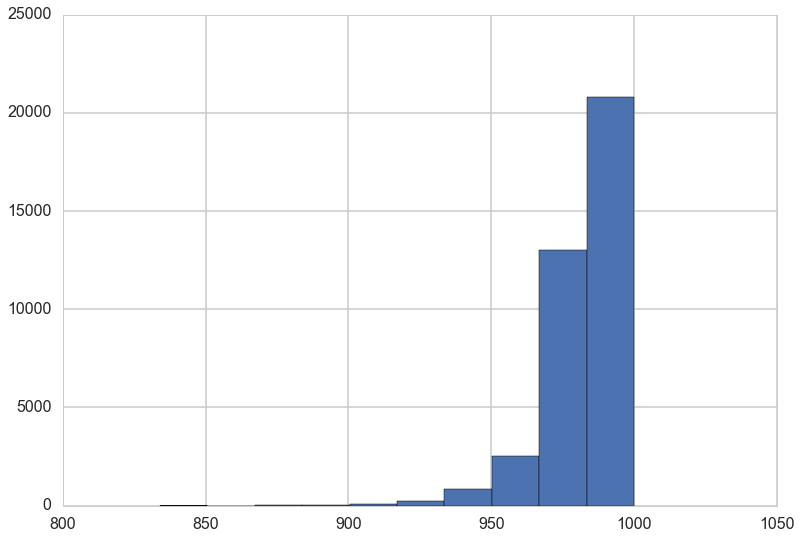

In [59]:
_=plt.hist([len(ele) for ele in sjk])

In [60]:
#We choose to only consider sites with 900 elements
sjk_adjusted = [ele for ele in sjk if len(ele)>=900]
sjk_adjusted = [ele[:900] for ele in sjk_adjusted]

len(sjk_adjusted), len(sjk)

(37539, 37574)

In [61]:
differences = [''.join([ele1 for ele1 in z if ele1 not in ['a','t','c','g','A','T','C','G']]) for z in sjk_adjusted]
differences[:10]

['', '', 'R', 'RR', 'Y', '', '', '', 'Y', '']

In [62]:
diff_counts = [len(ele) for ele in differences]
diff_counts[:10]

[0, 0, 1, 2, 1, 0, 0, 0, 1, 0]

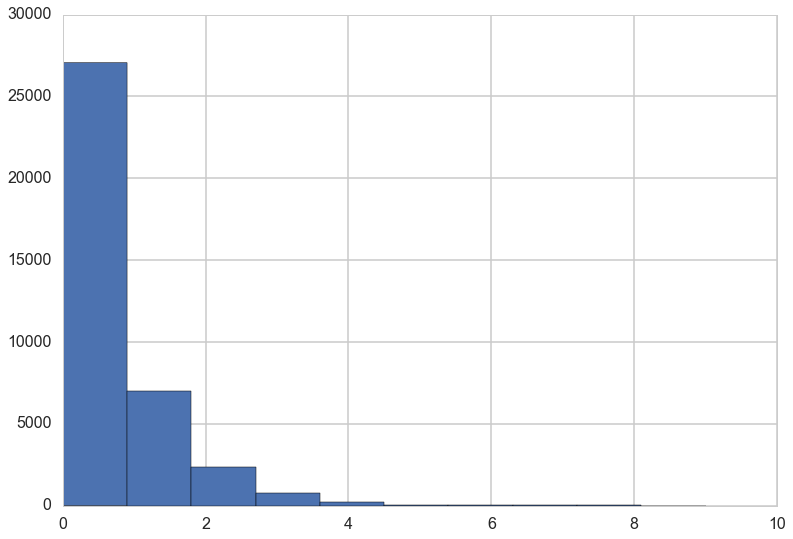

In [63]:
_= plt.hist(diff_counts)

In [ ]:
pop= get_seqs_from_file(i)
    num_diffs= adjust_seqs_find_diffs(pop, 900)
    plt.hist(num_diffs,range=[0,10])
    plt.title(title)
    
    minPt = min(num_diffs)
    maxPt = max(num_diffs)
    mx = {j:num_diffs.count(j) for j in range(minPt, maxPt +1)}
    all_num_diffs.append(mx)

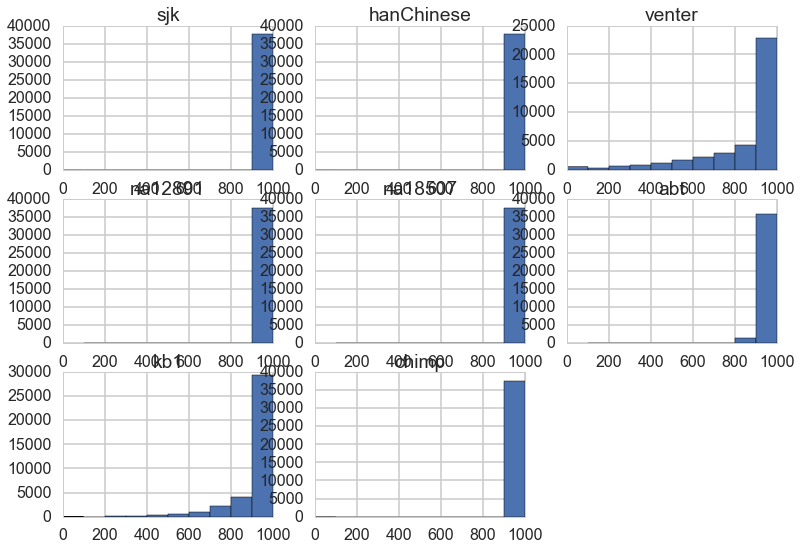

In [52]:
#Here we get an idea of the sequence lengths once we remove masked values for each of the different populations

for i,title in zip(range(1,9),['sjk', 'hanChinese', 'venter', 'na12891', 'na18507', 'abt', 'kb1', 'chimp']):
    subplot_num = 3*100 + 3*10 + i
    plt.subplot(subplot_num)
    pop= get_seqs_from_file(i)
    _=plt.hist([len(ele) for ele in pop], range=[0,1000])
    plt.title(title)

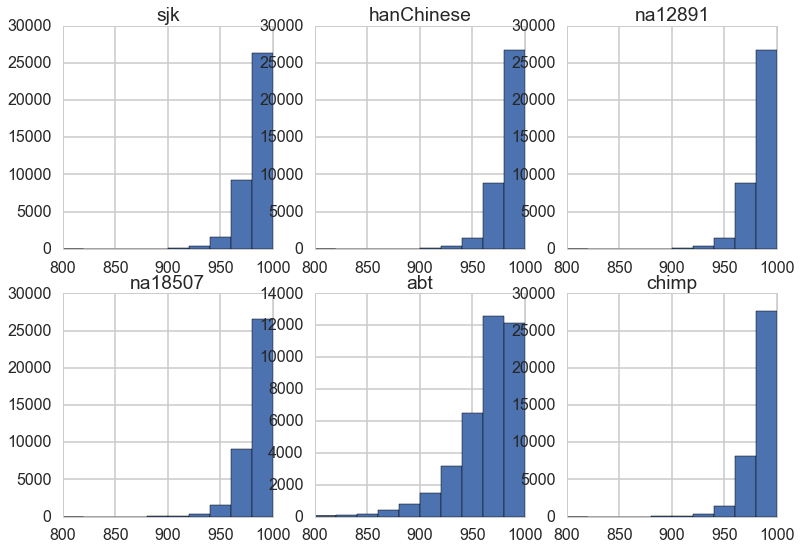

In [39]:
# We look at histograms after having removed venter and kb1, because they don't have very good sequence info. 
for sb_num, i,title in zip(range(1,7),[1,2,4,5,6,8],['sjk', 'hanChinese', 'na12891', 'na18507', 'abt',  'chimp']):
    subplot_num = 2*100 + 3*10 + sb_num
    plt.subplot(subplot_num)
    pop= get_seqs_from_file(i)
    _=plt.hist([len(ele) for ele in pop], range=[800,1000])
    plt.title(title)

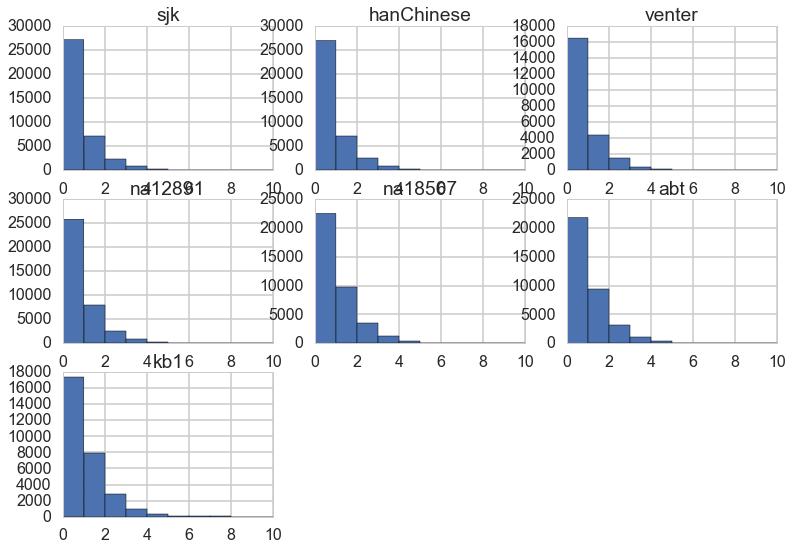

In [64]:
def adjust_seqs_find_diffs(pop, adjustment):
    seqs_adjusted = [seq for seq in pop if len(seq)>=adjustment]
    seqs_adjusted = [seq[:adjustment] for seq in seqs_adjusted]
    differences = [''.join([ele1 for ele1 in ele if ele1 not in ['a','t','c','g','A','T','C','G']]) for ele in seqs_adjusted]
    diff_counts = [len(ele) for ele in differences]
    return diff_counts

all_num_diffs=[]

#We remove the chimp sequence because isn't diploid like the rest (no Y, R, W, etc)
#for sb_num, i,title in zip(range(1,7),[1,2,4,5,6,7],['sjk', 'hanChinese', 'na12891', 'na18507', 'abt',  'chimp']):
for sb_num, i, title in zip(range(1,8), range(1,8),['sjk', 'hanChinese', 'venter', 'na12891', 'na18507', 'abt', 'kb1']):
    subplot_num = 3*100 + 3*10 + sb_num
    plt.subplot(subplot_num)
    pop= get_seqs_from_file(i)
    num_diffs= adjust_seqs_find_diffs(pop, 900)
    plt.hist(num_diffs,range=[0,10])
    plt.title(title)
    
    minPt = min(num_diffs)
    maxPt = max(num_diffs)
    mx = {j:num_diffs.count(j) for j in range(minPt, maxPt +1)}
    all_num_diffs.append(mx)
    

In [65]:
all_num_diffs

[{0: 27059, 1: 6989, 2: 2378, 3: 783, 4: 223, 5: 62, 6: 29, 7: 7, 8: 8, 9: 1},
 {0: 26887, 1: 7091, 2: 2427, 3: 764, 4: 264, 5: 66, 6: 38, 7: 5, 8: 7, 9: 1},
 {0: 16437, 1: 4355, 2: 1441, 3: 428, 4: 128, 5: 41, 6: 13, 7: 5, 8: 2},
 {0: 25763, 1: 7917, 2: 2615, 3: 858, 4: 277, 5: 74, 6: 27, 7: 11, 8: 7, 9: 1},
 {0: 22478,
  1: 9809,
  2: 3483,
  3: 1200,
  4: 398,
  5: 120,
  6: 47,
  7: 13,
  8: 3,
  9: 1},
 {0: 21756,
  1: 9400,
  2: 3211,
  3: 1006,
  4: 319,
  5: 86,
  6: 27,
  7: 10,
  8: 3,
  9: 1},
 {0: 17395,
  1: 7945,
  2: 2760,
  3: 952,
  4: 277,
  5: 115,
  6: 24,
  7: 13,
  8: 4,
  9: 1}]

In [66]:
[ele.values() for ele in all_num_diffs]

[[27059, 6989, 2378, 783, 223, 62, 29, 7, 8, 1],
 [26887, 7091, 2427, 764, 264, 66, 38, 5, 7, 1],
 [16437, 4355, 1441, 428, 128, 41, 13, 5, 2],
 [25763, 7917, 2615, 858, 277, 74, 27, 11, 7, 1],
 [22478, 9809, 3483, 1200, 398, 120, 47, 13, 3, 1],
 [21756, 9400, 3211, 1006, 319, 86, 27, 10, 3, 1],
 [17395, 7945, 2760, 952, 277, 115, 24, 13, 4, 1]]

In [69]:
for ele,pop in zip(all_num_diffs,['sjk', 'hanChinese', 'venter', 'na12891', 'na18507', 'abt', 'kb1']):
    print "mx." + pop + "<-c(",
    for val in ele.values():
        print str(val) + ',',
    print ')'

 mx.sjk<-c( 27059, 6989, 2378, 783, 223, 62, 29, 7, 8, 1, )
mx.hanChinese<-c( 26887, 7091, 2427, 764, 264, 66, 38, 5, 7, 1, )
mx.venter<-c( 16437, 4355, 1441, 428, 128, 41, 13, 5, 2, )
mx.na12891<-c( 25763, 7917, 2615, 858, 277, 74, 27, 11, 7, 1, )
mx.na18507<-c( 22478, 9809, 3483, 1200, 398, 120, 47, 13, 3, 1, )
mx.abt<-c( 21756, 9400, 3211, 1006, 319, 86, 27, 10, 3, 1, )
mx.kb1<-c( 17395, 7945, 2760, 952, 277, 115, 24, 13, 4, 1, )


Here we double check that the distance between loci is 50000 base pairs.  (We might want to increase that)
We plot a histogram of the distance between loci.

In [15]:
def get_chromoInfo_from_file():
    neutralLoci7Genomes = open("../../Downloads/neutralLoci-7genomes.txt", "r")
    neutralLoci7Genomes.readline()
    a = neutralLoci7Genomes.readline()

    chromos = []
    counter = 0
    while a[0]:
        chromo = a[0].split('\t')[0]
        chromo = chromo.replace('.', ' ').replace('-', ' ').split(' ')
        chromos.append(chromo)
        a = [neutralLoci7Genomes.readline() for i in range(10)]
    neutralLoci7Genomes.close()
    return chromos

list_of_chromos=get_chromoInfo_from_file()[1:]
print list_of_chromos[:10]
list_of_diffs = []
for i, ele in enumerate(list_of_chromos[:-1]):
    if ele[0] == list_of_chromos[i+1][0]:
        list_of_diffs.append(list_of_chromos[i+1][1] - ele[2])





[['chr1', '1020046', '1021046'], ['chr1', '1507918', '1508918'], ['chr1', '1696548', '1697548'], ['chr1', '1748299', '1749299'], ['chr1', '1799329', '1800329'], ['chr1', '1882409', '1883409'], ['chr1', '1954389', '1955389'], ['chr1', '2014052', '2015052'], ['chr1', '2080460', '2081460'], ['chr1', '2136631', '2137631']]


[['chr1', '1020046', '1021046'], ['chr1', '1507918', '1508918'], ['chr1', '1696548', '1697548'], ['chr1', '1748299', '1749299'], ['chr1', '1799329', '1800329'], ['chr1', '1882409', '1883409'], ['chr1', '1954389', '1955389'], ['chr1', '2014052', '2015052'], ['chr1', '2080460', '2081460'], ['chr1', '2136631', '2137631']]
['chr9', '38691217', '38692217'] ['chr9', '70221926', '70222926']


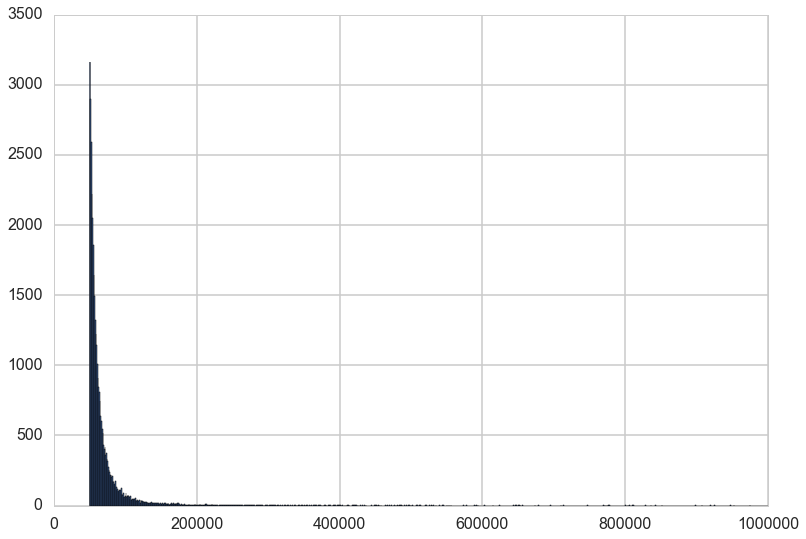

In [27]:
print list_of_chromos[:10]
list_of_diffs = []
for i, ele in enumerate(list_of_chromos[:-1]):
    if ele[0] == list_of_chromos[i+1][0]:
        space_between = int(list_of_chromos[i+1][1]) - int(ele[2])
        list_of_diffs.append(space_between)
        if space_between > 30000000:
            print ele, list_of_chromos[i+1]

_=plt.hist(list_of_diffs, bins = 1000, range=[49999, 1000000])

In [23]:
min(list_of_diffs)

50000

In [25]:
np.median(list_of_diffs)

58221.0

In [26]:
max(list_of_diffs)

31529709